# Problem Statement: 
Importing necessary libraries, Import Dataset from the given link, Clean the data, Perform exploratory data analysis, Transform the data, Find traveling time and Calculate the average speed of the trip.


• Data Set Link: https://www.kaggle.com/mohamed08/exploratory-data-analysis-for-uber-trips/data




In [141]:
#Importing libraries

In [142]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [143]:
#loading dataset

In [144]:
uber=pd.read_csv("UberDrives.csv")

In [145]:
uber  

START_DATE*         END_DATE* CATEGORY*            START*  \
0       1/1/2016 21:11    1/1/2016 21:17  Business       Fort Pierce   
1        1/2/2016 1:25     1/2/2016 1:37  Business       Fort Pierce   
2       1/2/2016 20:25    1/2/2016 20:38  Business       Fort Pierce   
3       1/5/2016 17:31    1/5/2016 17:45  Business       Fort Pierce   
4       1/6/2016 14:42    1/6/2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*         PURPOSE*  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0              NaN  
2          Fort Pierce      4.8  Errand/Supplies  
3          Fort Pierce      4.7          Meeting  
4      West Palm Beach     63.7   Customer Visit  
...                ...      ...              ...  
1151  Unknown Location      3.9   Temporary Site  
1152  Unknown Location     16.2          Meeting  
1153           Gampaha      6.4   Temporary Site  
1154         Ilukwatta     48.2   Temporary Site  
1155               NaN  12204.7              NaN  

[1156 rows x 7 columns]

In [146]:
#removing last row
uber=uber[:-1]


In [148]:
#changing the date &t ime format

uber['START_DATE*']=uber['START_DATE*'].astype('datetime64[ns]')
uber['END_DATE*']=uber['END_DATE*'].astype('datetime64[ns]')


In [149]:
#calculating time difference
uber['Time'] = uber['END_DATE*']-uber['START_DATE*']

In [150]:
uber.head()

START_DATE*           END_DATE* CATEGORY*       START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

             STOP*  MILES*         PURPOSE*            Time  
0      Fort Pierce     5.1   Meal/Entertain 0 days 00:06:00  
1      Fort Pierce     5.0              NaN 0 days 00:12:00  
2      Fort Pierce     4.8  Errand/Supplies 0 days 00:13:00  
3      Fort Pierce     4.7          Meeting 0 days 00:14:00  
4  West Palm Beach    63.7   Customer Visit 0 days 01:07:00

In [151]:
#converting time to minute

In [152]:
min=[]
for x in uber['Time']:
   min.append(x.total_seconds()/60)
uber['Time']=min



In [180]:
uber.head()

START_DATE*           END_DATE* CATEGORY*       START*  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

             STOP*  MILES*         PURPOSE*  Time   Trip Info Month  Day  \
0      Fort Pierce     5.1   Meal/Entertain   6.0  Round Trip   Jan    1   
1      Fort Pierce     5.0              NaN  12.0  Round Trip   Jan    2   
2      Fort Pierce     4.8  Errand/Supplies  13.0  Round Trip   Jan    2   
3      Fort Pierce     4.7          Meeting  14.0  Round Trip   Jan    5   
4  West Palm Beach    63.7   Customer Visit  67.0     One way   Jan    6   

   Hour  Speed(Km/h)  
0    21    82.076340  
1     1    40.233500  
2    20    35.653071  
3    17    32.416706  
4    14    91.804440

<AxesSubplot:title={'center':'Different Categories'}>

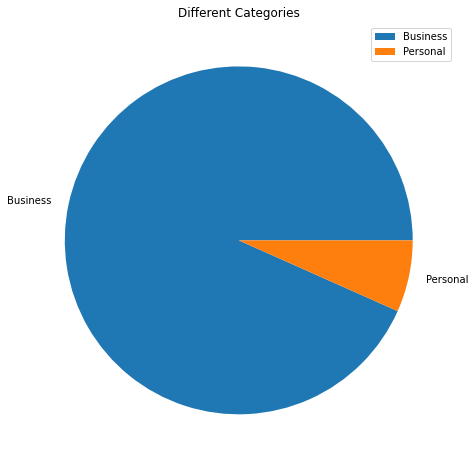

In [154]:
#plotting categories
uber['CATEGORY*'].value_counts().plot(kind='pie',figsize=(8,8),legend=True,ylabel="",title="Different Categories")

In [155]:
#finding trip type round trip or one way

In [156]:
rt=[]

for i in range(len(uber)):
    if(uber['START*'][i]==uber['STOP*'][i]):
        rt.append('Round Trip')
    else:
        rt.append('One way')
        
uber['Trip Info']=rt

In [157]:
#plotting trip type

<AxesSubplot:title={'center':'Types of trip'}>

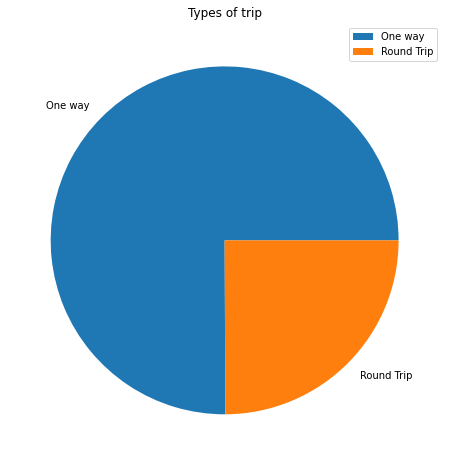

In [158]:

uber['Trip Info'].value_counts().plot(kind='pie',figsize=(8,8),legend=True,title="Types of trip",ylabel="")

In [159]:
#extracting hour ,month,date from START_DATE*

In [160]:
hour=[]
day=[]
month=[]
for i in uber['START_DATE*']:
    month.append(i.month)
    day.append(i.day)
    hour.append(i.hour)
    
uber['Month'] = month
uber['Day'] = day
uber['Hour'] = hour

In [161]:
#mapping month no to name
mnth= {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
uber['Month'] = uber['Month'].map(mnth)

In [162]:
#calculating the average speed of trip in miles per hour
uber['Speed(Km/h)'] = (uber['MILES*']*60/ uber['Time'])*1.60934

In [163]:
#replacing inf value to nan
uber=uber.replace(np.inf,np.nan)

In [164]:
#plotting no of trips per month

Text(0.5, 1.0, 'Number of trips per Month of the year')

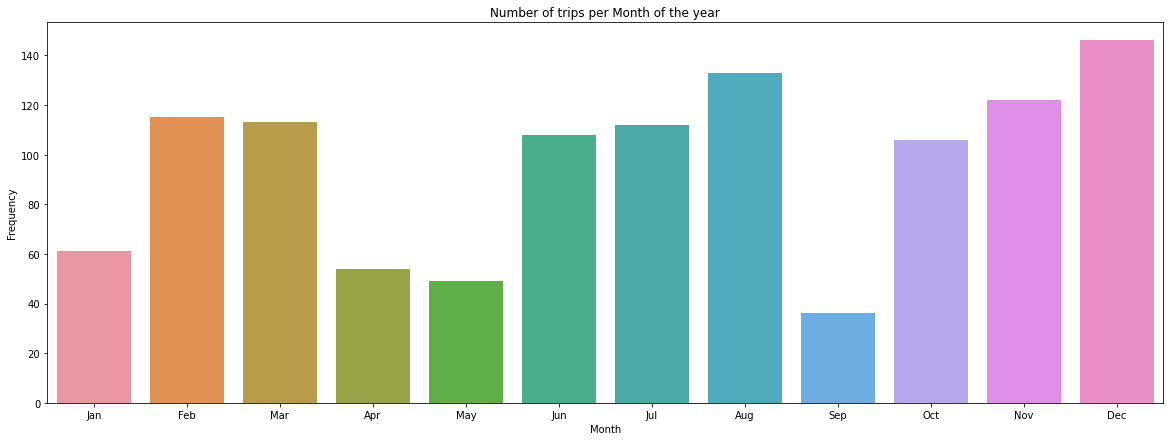

In [165]:
plt.figure(figsize=(20,7))
sns.countplot(uber['Month'])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month of the year')

In [166]:
# Highest trip made in the month

In [167]:
print("Highest trip made in the month : "+uber['Month'].value_counts().idxmax())


Highest trip made in the month : Dec


Text(0.5, 1.0, 'Number of trips per day of the week')

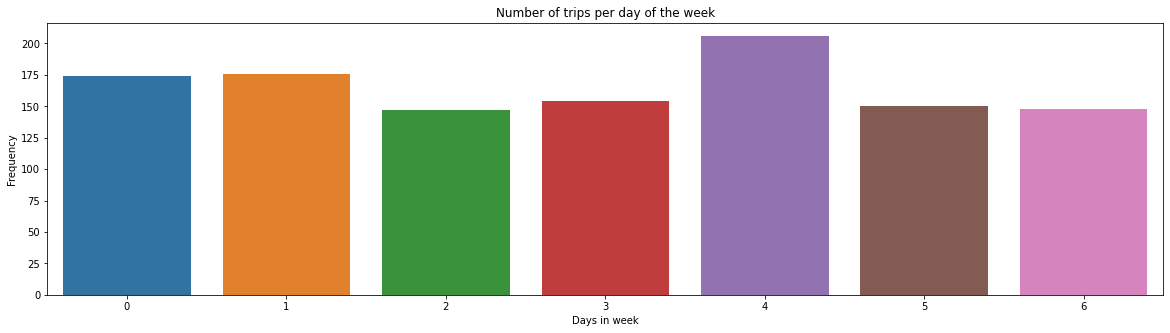

In [168]:
#plotting trip in weekdays
plt.figure(figsize=(20,5))
sns.countplot(uber['START_DATE*'].dt.weekday)
plt.xlabel('Days in week')
plt.ylabel('Frequency')
plt.title('Number of trips per day of the week')

Text(0.5, 1.0, 'Number of trips per hour of the day')

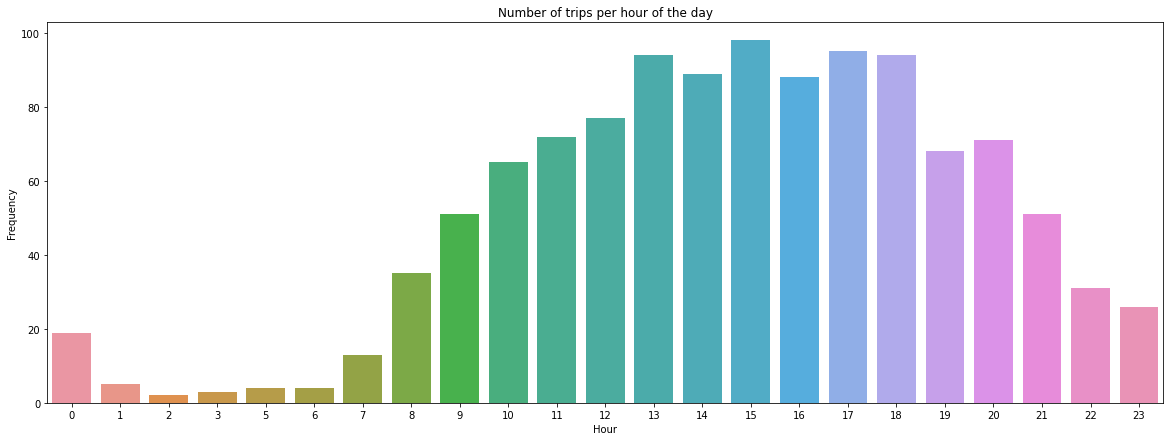

In [169]:
plt.figure(figsize=(20,7))
sns.countplot(uber['Hour'])
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Number of trips per hour of the day')

Text(0.5, 1.0, 'Number of trips per day of the month')

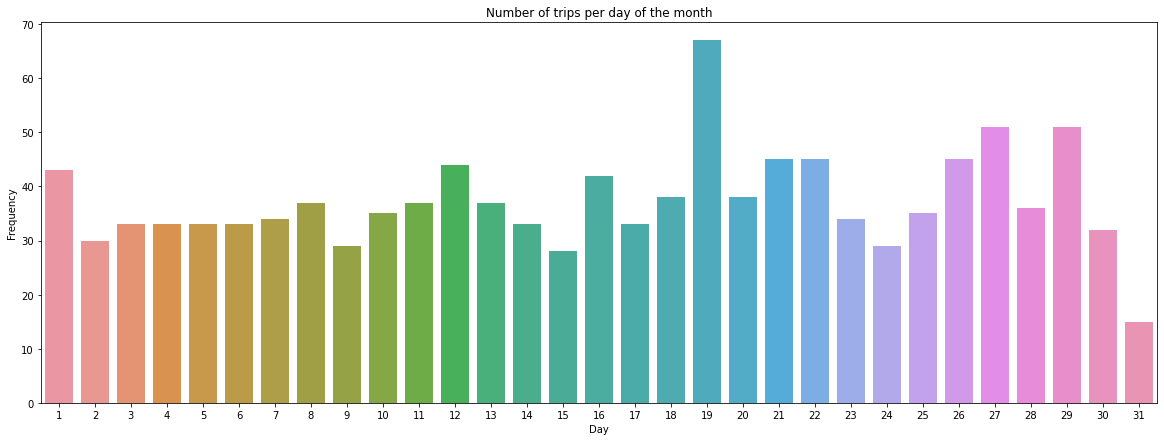

In [170]:
plt.figure(figsize=(20,7))
sns.countplot(uber['Day'])
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Number of trips per day of the month')


In [171]:
#plotting purpose

<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

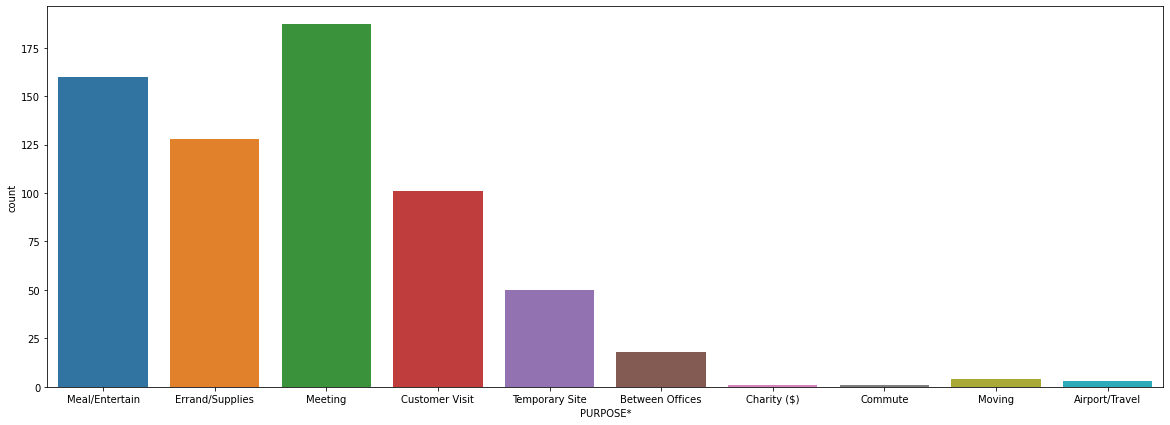

In [172]:
plt.figure(figsize=(20,7))
sns.countplot(uber['PURPOSE*'])



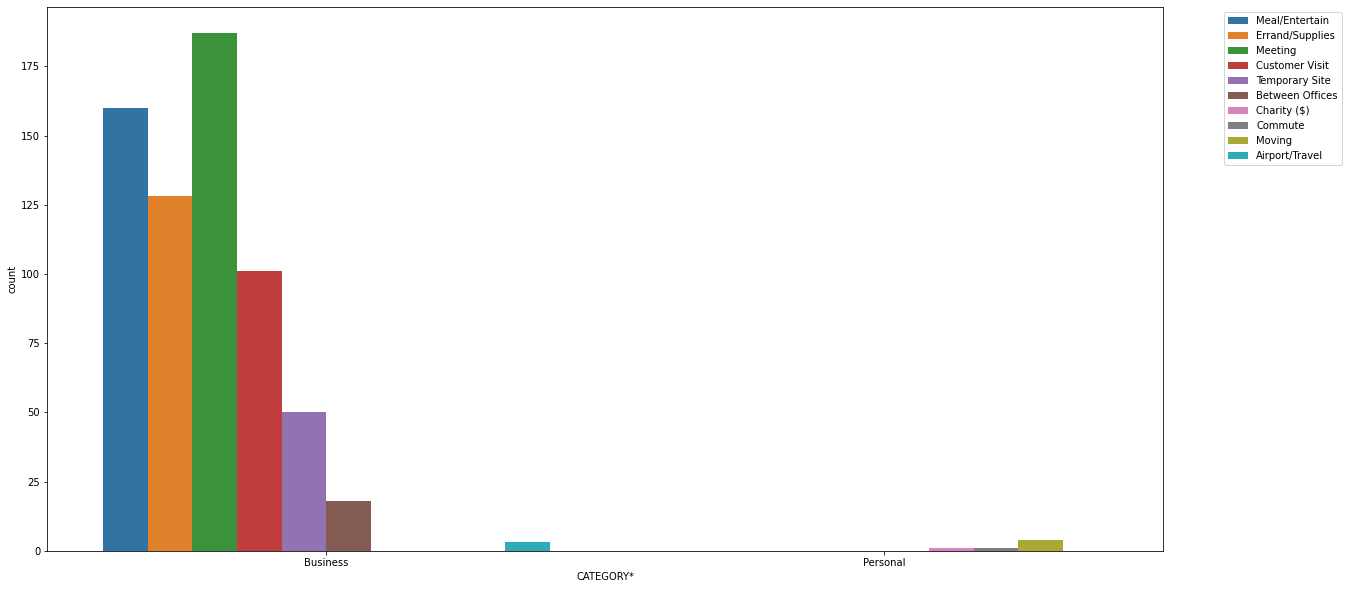

In [173]:
plt.figure(figsize=(20,10))
sns.countplot(uber['CATEGORY*'],hue=uber['PURPOSE*'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


<AxesSubplot:xlabel='PURPOSE*'>

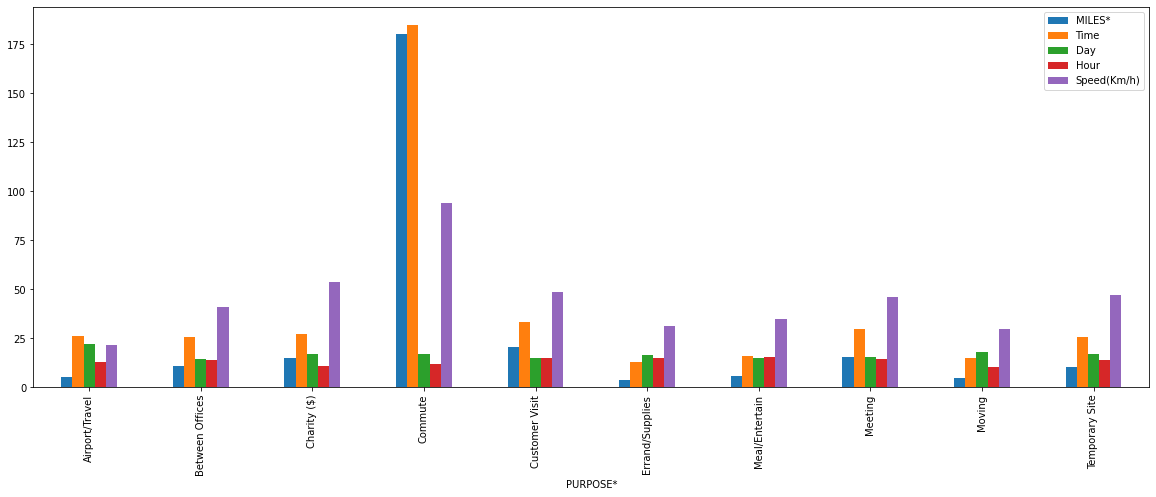

In [174]:
#mean of Miles,time, day,Hour and speed for each purpose
purpose = uber.groupby('PURPOSE*').mean()
purpose.plot(kind = 'bar',figsize=(20,7))

<AxesSubplot:xlabel='CATEGORY*'>

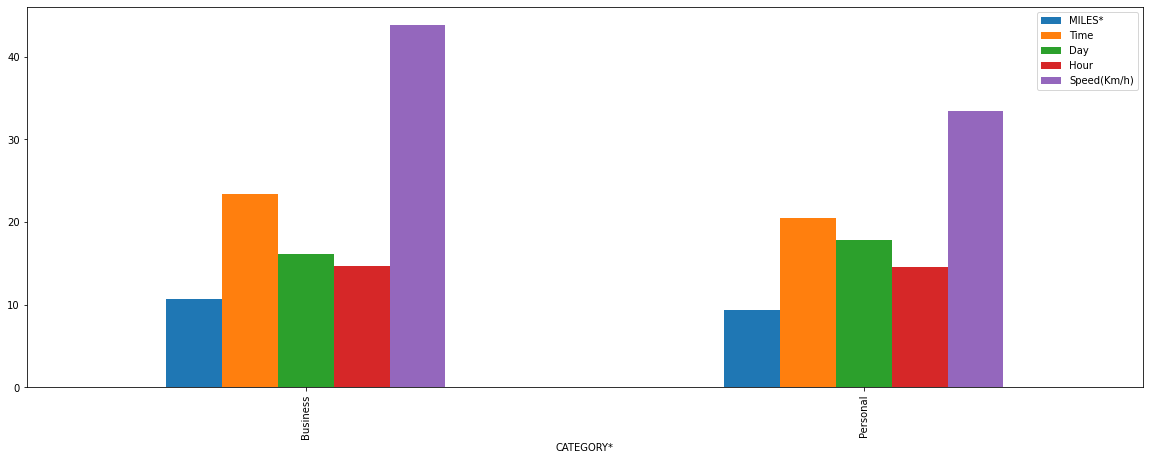

In [175]:
#mean of Miles,time, day,Hour and speed for each category
c = uber.groupby('CATEGORY*').mean()
c.plot(kind ='bar',figsize=(20,7))

<AxesSubplot:xlabel='Month'>

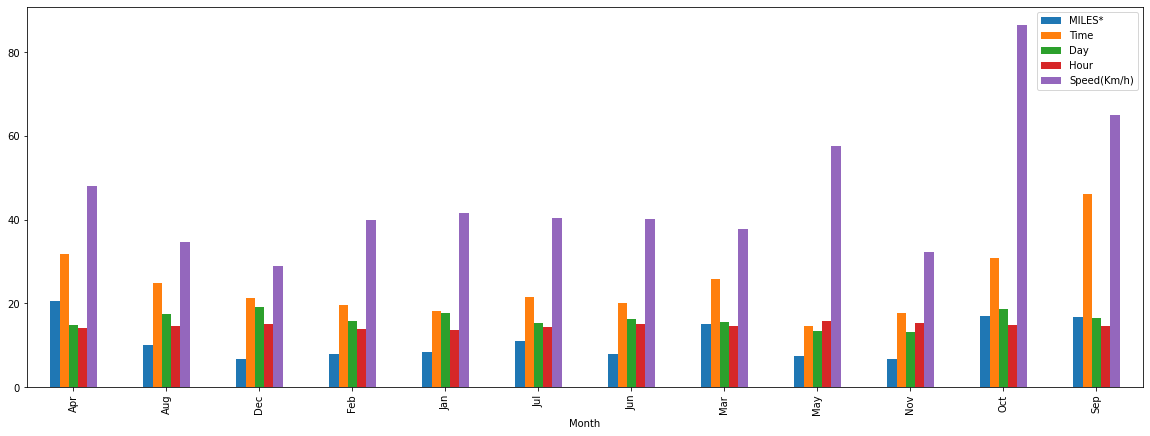

In [176]:
#mean of Miles,time, day,Hour and speed for each month
c = uber.groupby('Month').mean()
c.plot(kind = 'bar',figsize=(20,7))

<AxesSubplot:ylabel='Hour'>

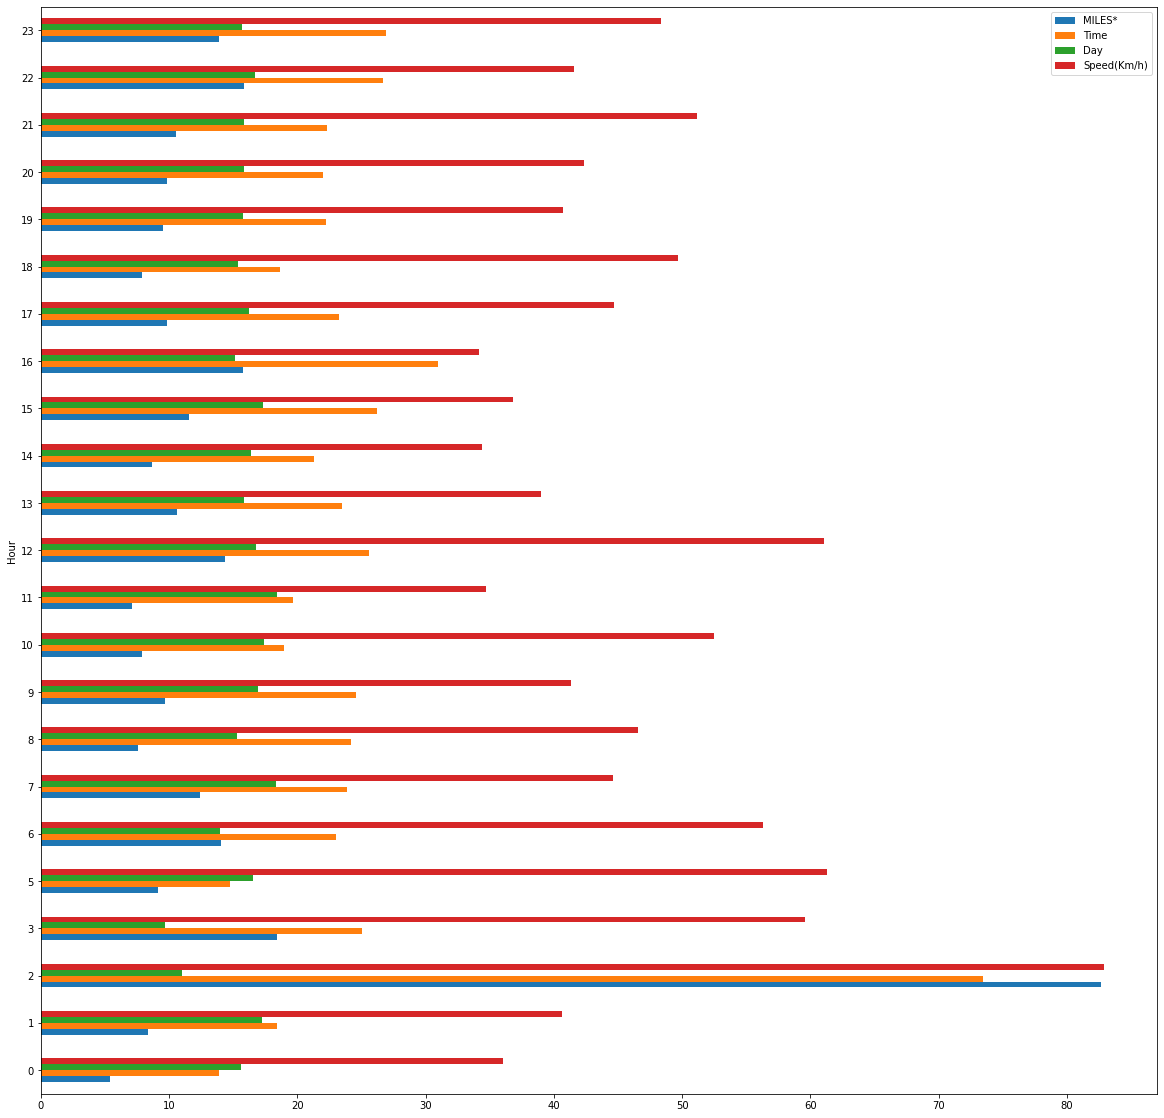

In [177]:
#mean of Miles,time, day,Hour and speed for each hour
c = uber.groupby('Hour').mean()
c.plot(kind = 'barh',figsize=(20,20))

<AxesSubplot:ylabel='Day'>

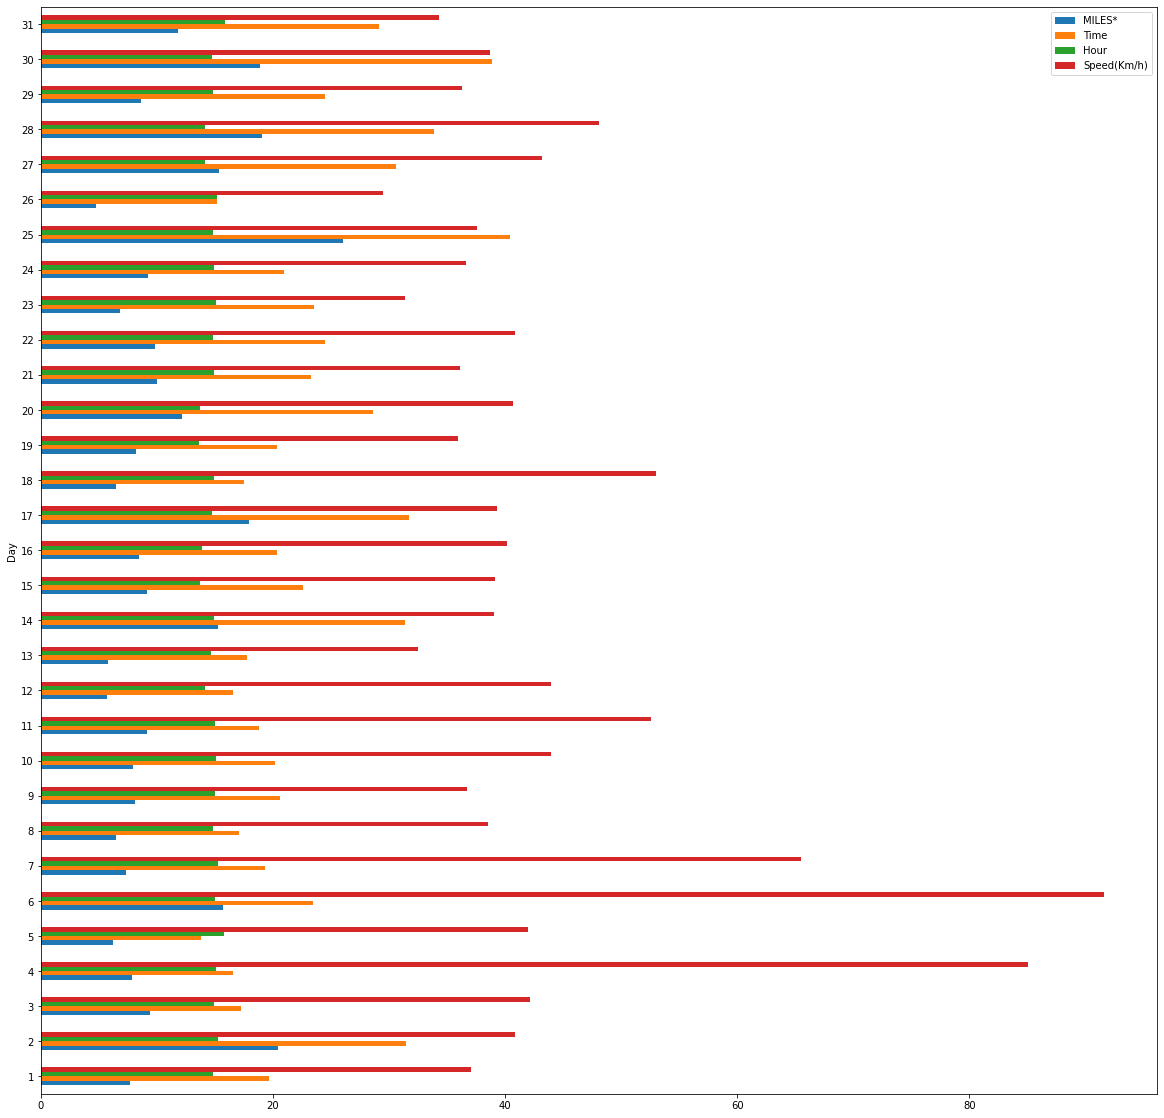

In [178]:
#mean of Miles,time, day,Hour and speed for each Day
c = uber.groupby('Day').mean()
c.plot(kind = 'barh',figsize=(20,20))

In [179]:
print("Traveling Time and average speed ")
uber[['Time','Speed(Km/h)']]

Traveling Time and average speed 


Time  Speed(Km/h)
0       6.0    82.076340
1      12.0    40.233500
2      13.0    35.653071
3      14.0    32.416706
4      67.0    91.804440
...     ...          ...
1150    7.0     9.656040
1151   18.0    20.921420
1152   35.0    44.693671
1153   18.0    34.332587
1154  103.0    45.186517

[1155 rows x 2 columns]